# [LAB 10] 5.단일 표본 T-Test (One Sample T TEST)



- 하나의 모집단 평균이 이전과 달라졌는지/같은지, 달라졌다면 커졌는지/작아졌는지를 통계적으로 알아보기 위해서 사용
- 기존에 알려져 있던 사실이 현재는 어떻게 변화 했는지를 확인하는 방법
- 단일 표본 T TEST 에서는 데이터의 정규성만을 확인하고, 등분산성은 확인하지 않는다
- 등분산성은 2개 이상의 집단일 경우에만 확인한다






### #01.준비작업
#### [1] 패키지 참조


In [7]:
from hossam import load_data
from matplotlib import pyplot as plt
from matplotlib import font_manager as fm
import seaborn as sb
import numpy as np
from math import sqrt
 # 단일표본 T-Test를 위한 라이브러리
from scipy.stats import t, ttest_1samp, normaltest

#### [2] 그래프 초기화

In [8]:
#한글을 지원하는 폰트 파일의 경로
font_path ='C:\\Data_Analysis_Basic\\[LAB-06] 데이터 시각화 개요\\NotoSansKR-Regular.ttf'
#폰트의 그룹을 시스템에 등록
fm.fontManager.addfont(font_path)
#폰트의 속성을 읽어옴
font_prop = fm.FontProperties(fname=font_path)
#읽어온 속성에서 폰트의 이름만 추출
font_name = font_prop.get_name()

#이미지의 선명도를 결정 (1인치 당 픽셀의 수)
my_dpi = 120 
#시스템에 등록된 글꼴 이름  (상단에서 확인한 폰트 이름으로 넣기)
my_font_name = 'Noto Sans KR'
#그림 스타일 지정
my_theme = 'dark'
#seaborn 스타일 (화풍 설정하기)
sb.set_theme(style=my_theme)
#그래프에 한글 폰트 적용
plt.rcParams['font.family']=my_font_name
#기본 폰트 크기
plt.rcParams['font.size'] =16
#그래프에 마이너스 꺠짐 방지 (한글환경에서 필수)
plt.rcParams['axes.unicode_minus']=False

### #2 예제1 - 강아지 체온 변화 
dog_temperature 데이터는 강아지 25마리의 체온을 측정한 데이터이다. 과거의 자료에서 강아지의 평균 체온은 24.3알려져 있다.
이번에 조사한 데이터에서도 강아지의 평균 체온이 24.3이라고 해도 좋은지 알고 싶다.
주어진 데이터가 정규성을 충족하는지 확인한 후 정규성이 충족된다면 강아지의 평균 체온에 대한 가설검정을 수행하라.

#### [1] 데이터 가져오기

In [9]:
origin = load_data('dog_temperature')

print("\n=====  데이터 크기 확인 =====")
print(f"데이터셋 크기: {origin.shape}")
print(f"열 개수: {origin.shape[1]}")
print(f"행 개수: {origin.shape[0]}")

print("\n=====  타입확인 =====")
print(origin.info())

origin.head()


[data] https://data.hossam.kr/data/lab10/dog_temperature.xlsx
[desc] 강아지 25마리의 체온을 측정한 데이터 (출처: 방송통신대학교 통계학개론)
[!] Cannot read metadata

=====  데이터 크기 확인 =====
데이터셋 크기: (25, 1)
열 개수: 1
행 개수: 25

=====  타입확인 =====
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   체온      25 non-null     float64
dtypes: float64(1)
memory usage: 332.0 bytes
None


,체온
0,25.8
1,24.6
2,26.1
3,22.9
4,25.1


#### [2] 신뢰구간 확인

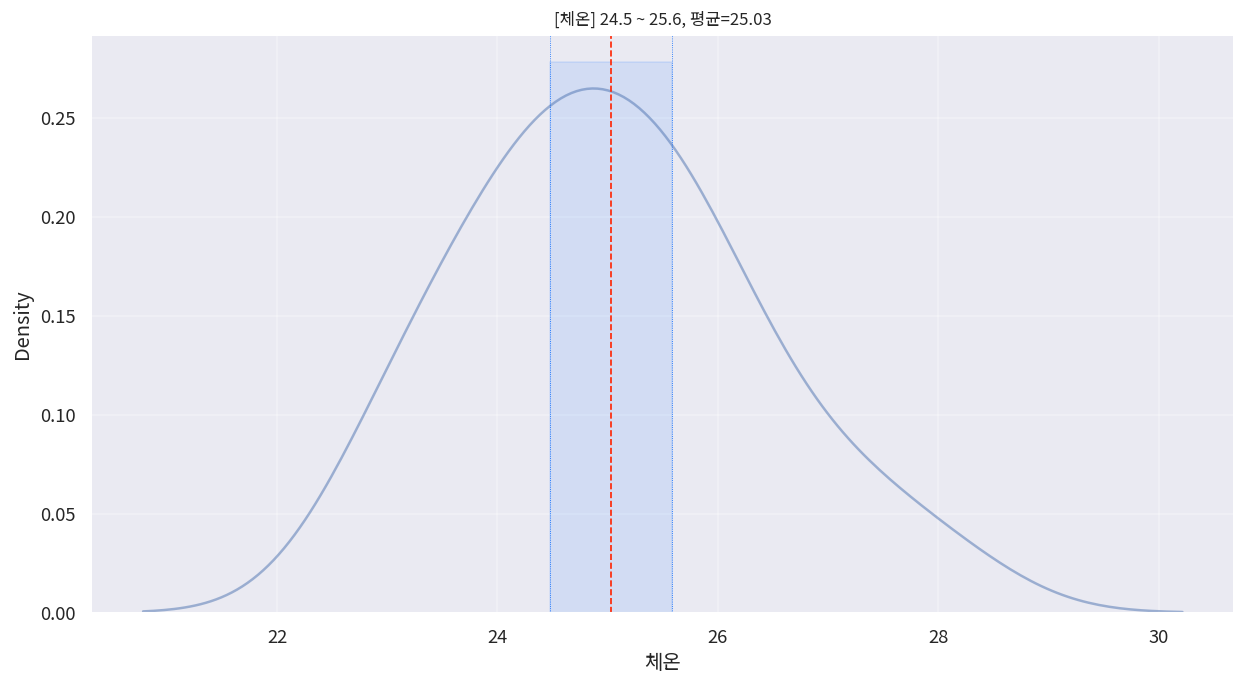

In [10]:
data = origin['체온']                     # 확인할 데이터(컬럼단위)
max = data.max()                         # 최대값
clevel = 0.95                            # 신뢰수준
dof = len(data) - 1                      # 자유도
sp_mean = data.mean()                    # 표본평균
sp_std = data.std(ddof=1)                # 표본표준편차
sp_std_error = sp_std / sqrt(len(data))  # 표본표준오차

# 신뢰구간
cmin, cmax = t.interval(clevel, dof, loc=sp_mean, scale=sp_std_error)

# 1) 그래프 초기화
width_px  = 1280                         # 그래프 가로 크기
height_px = 720                          # 그래프 세로 크기
rows = 1                                 # 그래프 행 수
cols = 1                                 # 그래프 열 수
figsize = (width_px / my_dpi, height_px / my_dpi)
fig, ax = plt.subplots(rows, cols, figsize=figsize, dpi=my_dpi)

# 2) KDE Plot 그리기
sb.kdeplot(data=data, fill=False, alpha=0.5)

# 신뢰구간 범위 그리기 (cmin ~ cmax)
ax.axvline(cmin, linestyle=':', color='#0066ff', linewidth=0.5)
ax.axvline(cmax, linestyle=':', color='#0066ff', linewidth=0.5)

# 현재 축 범위 가져오기
ymin, ymax = ax.get_ylim()
ax.fill_between([cmin, cmax], 0, ymax, alpha=0.1, color='#0066ff88')

# 평균 표시
ax.axvline(sp_mean, linestyle='--', linewidth=1, color='#ff2200')

# 3) 그래프 꾸미기
ax.grid(True, alpha=0.3)                 # 배경 격자 표시/숨김
ax.set_title(f"[{data.name}] {cmin:.1f} ~ {cmax:.1f}, 평균={sp_mean:.2f}", fontsize=10)

# 4) 출력
plt.tight_layout()                       # 여백 제거
plt.show()                               # 그래프 화면 출력
plt.close()                              # 그래프 작업 종료


> 커널 밀도 함수 그래프의 모양이 정규 분포를 띄고 있고, 표본 평균 25.03 이 신뢰구간에 포함되어 있어 강아지의 체온이 정상 범위에 있다고 할 수 있다

#### [3] 데이터의 정규성 검정

In [11]:
s, p = normaltest(origin['체온'])
"statistic: {0:.3f}, p-value: {1:.3f}, 정규성 충족 여부: {2}".format(s, p, p > 0.05)

'statistic: 0.819, p-value: 0.664, 정규성 충족 여부: True'

> p-value 가 0.664 이므로 p > 0.05 정규성을 충족한다

#### [4] 강아지의 평균 체온이 이전에 알려져있던 24.3과 달라졌는지 여부
(1) T 검증 수행

| 구분              | 수식       | 내용                                            |
|-------------------|------------|-------------------------------------------------|
| 강아지의 평균 체온 | μ          |                                                 |
| 귀무가설(H₀)      | μ = 24.3   | 강아지의 평균 체온은 24.3과 차이가 없다.       |
| 대립가설(H₁)      | μ ≠ 24.3   | 강아지의 평균 체온은 24.3과 차이가 있다.       |


In [12]:
s, p = ttest_1samp(origin['체온'], 24.3)
"statistic: {0:.3f}, p-value: {1:.3f}, {2}가설 채택".format(s, p, "대립" if p <= 0.05 else "귀무")

'statistic: 2.713, p-value: 0.012, 대립가설 채택'

## (2) 결과 해석

### statistic(T값, 검정 통계량)
표본 데이터를 이용하여 계산되는 값으로 p-값을 계산하기 위해 사용된다.

### P값(p-value)

| 구분              | 설명                                                    | 결론           |
|-------------------|---------------------------------------------------------|----------------|
| P ≤ 0.01          | 귀무가설이 옳을 확률이 0.01 이하(깐깐한 기준)           | 대립가설 채택 |
| P ≤ 0.05          | 귀무가설이 옳을 확률이 0.05 이하(일반적인 기준)         | 대립가설 채택 |
| 0.05 < P ≤ 0.1    | 애매한 경우(샘플링을 다시 한다)                         | 귀무가설 채택 |
| 0.1 ≤ P           | 귀무가설이 옳을 확률이 0.1 이상                          | 귀무가설 채택 |

---

### 결과값의 의미

출력에서 일표본 T검정에 대한 유의확률값이 **0.012**로  
통상적인 유의수준 **0.05**보다 작으므로 유의수준 0.05에서  
강아지 25마리의 체온이 추출된 모집단의 평균인 **24.3**이라고 할 수 없다.


#### 🐶 [5] 강아지의 평균 체온이 과거의 자료인 24.3보다 작아졌는지 알고자 하는 경우

`alternative` 파라미터에 `less`를 설정한다.

대립가설을 중심으로 생각하면 쉽다.

| 구분          | 수식       | 설명                                  |
|---------------|------------|----------------------------------------|
| 귀무가설(H₀)  | μ ≥ 24.3   | 강아지의 평균 체온은 24.3보다 작지 않다 |
| 대립가설(H₁)  | μ < 24.3   | 강아지의 평균 체온은 24.3보다 작다     |



In [13]:
s, p = ttest_1samp(origin['체온'], 24.3, alternative='less')
print(
    "statistic: {0:.3f}, p-value: {1:.3f}, {2}가설 채택"
    .format(s, p, "대립" if p <= 0.05 else "귀무")
)

statistic: 2.713, p-value: 0.994, 귀무가설 채택


> p-value 가 0.05 보다 커 귀무가설을 기각할 수 없다. 즉, 강아지의 평균 체온은 24.3 보다 작지 않다

#### [6] 강아지의 평균 체온이 과거의 자료인 24.3 보다 커졌는지 알고자 하는 경우

| 구분          | 수식       | 설명                                  |
|---------------|------------|----------------------------------------|
| 귀무가설(H₀)  | μ ≤ 24.3   | 강아지의 평균 체온은 24.3보다 크지 않다 |
| 대립가설(H₁)  | μ > 24.3   | 강아지의 평균 체온은 24.3보다 크다     |



In [14]:
s, p = ttest_1samp(origin['체온'], 24.3, alternative='greater')
print(
    "statistic: {0:.3f}, p-value: {1:.3f}, {2}가설 채택"
    .format(s, p, "대립" if p <= 0.05 else "귀무")
)


statistic: 2.713, p-value: 0.006, 대립가설 채택


> p-value 가 0.05 보다 작으므로 귀무가설을 기각하고 대립가설을 채택한다. 즉 ,강아지의 평균 체온은 24.3 보다 크다

### #03. 예제(2) - 생명보험 가입 금액 평균 비교
insur 데이터는 어느 보험회사에서 한해 동안 모집한 가입원들에 대한 가입 정보이다.
이 회사에서 올해 실적을 가입원들의 평균 가입금액이 1억원인 것을 목표로 삼았을 때,
이 회사는 목표실적을 달성했다고 볼 수 있는지 검정하라.

#### [1] 데이터 가져오기

In [15]:
origin = load_data('insur')
origin.head()

[data] https://data.hossam.kr/data/lab10/insur.xlsx
[desc] 어느 보험회사에서 한해 동안 모집한 가입원들에 대한 가입 정보 (출처: 방송통신대학교 통계학개론)

field     description
--------  ------------------------------------------------------
직업      1=육체노동, 2=정신노동(직상인), 3=자영업
교육수준  1=초등학교 이하, 2=중졸 및 고졸, 3=대졸, 4=대학원 졸업
성별      1=남자, 2=여자
나이      숫자
가입금액  단위=천만원
월수입    단위=만원



,직업,교육수준,성별,나이,가입금액,월수입
0,1,2,1,35,15.0,100
1,2,3,1,40,10.0,150
2,2,3,2,36,8.0,120
3,3,4,2,38,12.0,140
4,1,1,1,45,10.0,150


#### [2] 신뢰구간 확인

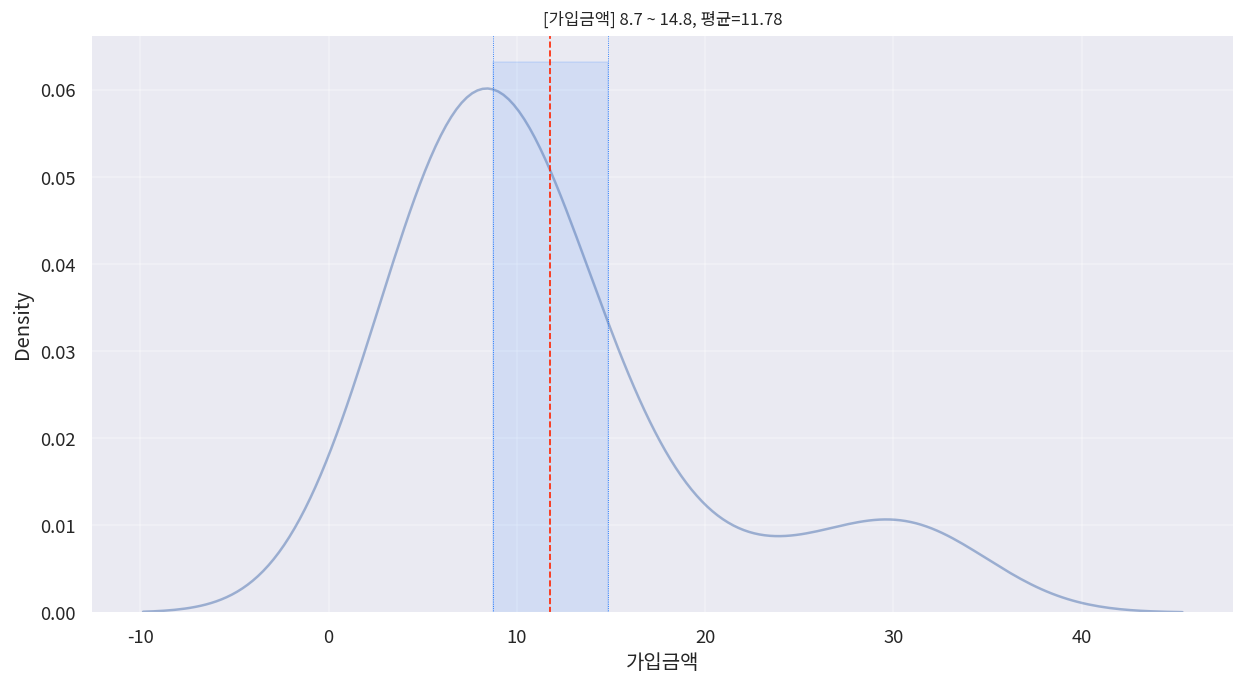

In [16]:
data = origin['가입금액']                     # 확인할 데이터(컬럼단위)
max = data.max()                         # 최대값
clevel = 0.95                            # 신뢰수준
dof = len(data) - 1                      # 자유도
sp_mean = data.mean()                    # 표본평균
sp_std = data.std(ddof=1)                # 표본표준편차
sp_std_error = sp_std / sqrt(len(data))  # 표본표준오차

# 신뢰구간
cmin, cmax = t.interval(clevel, dof, loc=sp_mean, scale=sp_std_error)

# 1) 그래프 초기화
width_px  = 1280                         # 그래프 가로 크기
height_px = 720                          # 그래프 세로 크기
rows = 1                                 # 그래프 행 수
cols = 1                                 # 그래프 열 수
figsize = (width_px / my_dpi, height_px / my_dpi)
fig, ax = plt.subplots(rows, cols, figsize=figsize, dpi=my_dpi)

# 2) KDE Plot 그리기
sb.kdeplot(data=data, fill=False, alpha=0.5)

# 신뢰구간 범위 그리기 (cmin ~ cmax)
ax.axvline(cmin, linestyle=':', color='#0066ff', linewidth=0.5)
ax.axvline(cmax, linestyle=':', color='#0066ff', linewidth=0.5)

# 현재 축 범위 가져오기
ymin, ymax = ax.get_ylim()
ax.fill_between([cmin, cmax], 0, ymax, alpha=0.1, color='#0066ff88')

# 평균 표시
ax.axvline(sp_mean, linestyle='--', linewidth=1, color='#ff2200')

# 3) 그래프 꾸미기
ax.grid(True, alpha=0.3)                 # 배경 격자 표시/숨김
ax.set_title(f"[{data.name}] {cmin:.1f} ~ {cmax:.1f}, 평균={sp_mean:.2f}", fontsize=10)

# 4) 출력
plt.tight_layout()                       # 여백 제거
plt.show()                               # 그래프 화면 출력
plt.close()                              # 그래프 작업 종료


> 표본평균(11.8)이 신뢰구간(8.7 ~ 14.8)에 포함되어 있으므로 가입금액의 데이터는 정상
범위에 있다고 할 수 있지만, 커널 밀도 함수 그래프의 모양을 보았을 때 정규분포를 만족하
지는 않고 있다.

#### [3] 데이터의 정규성 검정



In [17]:
s, p = normaltest(origin['가입금액'])
"statistic: {0:.3f}, p-value: {1:.3f}, 정규성 충족 여부: {2}".format(s, p, p > 0.05)

'statistic: 11.438, p-value: 0.003, 정규성 충족 여부: False'

> 주어진 데이터는 p value 가 0.003 이므로 정규성을 충족하지 않는다 (p value 가 0.05 보다 커야하는 케이스) . 하여 데이터에 로그변환을 하여 정규성에 가까워질 수 있도록 하자

#### [4] 데이터의 로그 변환
(1) 로그변환 수행
np.log10 은 자연로그보다 더 강하게 스케일을 적용한다 (값의 단위가 더 작아진다)
하지만 스케일링 후 통계의 결과는 달라지지 않는다

In [18]:
log_data = np.log(origin['가입금액'])
log_data

0     2.708050
1     2.302585
2     2.079442
3     2.484907
4     2.302585
5     0.916291
6     2.197225
7     2.014903
8     1.704748
9     3.218876
10    2.351375
11    1.252763
12    2.272126
13    2.525729
14    3.401197
15    2.397895
16    2.174752
17    1.504077
18    2.054124
19    1.902108
20    1.945910
21    3.496508
22    2.708050
23    2.995732
24    1.386294
25    1.609438
26    2.708050
27    3.401197
28    1.609438
29    2.302585
Name: 가입금액, dtype: float64

In [19]:
 # 목표금액 1억원
target_value = np.log(10)
target_value


np.float64(2.302585092994046)

(2) 결과에 대한 정규성 검정

In [20]:
s, p = normaltest(log_data)
"statistic: {0:.3f}, p-value: {1:.3f}, 정규성 충족: {2}".format(s, p, p > 0.05)

'statistic: 0.104, p-value: 0.950, 정규성 충족: True'

#### [5] 가입금액의 평균이 1억원과 같은지, 다른지 여부 판단

| 구분          | 수식      | 설명                                                     |
|---------------|-----------|----------------------------------------------------------|
| 귀무가설(H₀)  | μ = 1억    | 생명보험의 가입금액 평균은 1억과 차이가 없다.           |
| 대립가설(H₁)  | μ ≠ 1억    | 생명보험의 가입금액 평균은 1억과 차이가 있다(다르다).    |


In [21]:
s, p = ttest_1samp(log_data, target_value)
"statistic: {0:.3f}, p-value: {1:.3f}, {2}가설 채택".format(s, p, "대립" if p <= 0.05 else "귀무")

'statistic: -0.326, p-value: 0.747, 귀무가설 채택'

단일 표본 검정에서 유의확률이 0.05보다 크므로, 보험 가입금액의 모평균이 1억원이라는 귀무가설을 기각할 수 없다.

즉, 보험 가입금액의 평균은 1억원이다

#### [6] 가입금액의 평균이 1억원보다 작은지 여부
| 구분          | 수식      | 설명                                                      |
|---------------|-----------|-----------------------------------------------------------|
| 귀무가설(H₀)  | μ ≥ 1억    | 생명보험의 가입금액 평균은 1억보다 작지 않다.            |
| 대립가설(H₁)  | μ < 1억    | 생명보험의 가입금액 평균은 1억보다 작다.                 |


In [22]:
s, p = ttest_1samp(log_data, target_value, alternative='less')
"statistic: {0:.3f}, p-value: {1:.3f}, {2}가설 채택".format(s, p, "대립" if p <= 0.05 else "귀무")

'statistic: -0.326, p-value: 0.374, 귀무가설 채택'

> 단일 표본 검정에서 유의확률이 유의주순 0.05 보다 크므로, 보험 가입금액의 모평균이 1억원보다 작지 않다는 귀무 가설을 기각할 수 없다

#### [7] 가입 금액의 평균이 1억원보다 큰지 여부
| 구분          | 수식      | 설명                                                   |
|---------------|-----------|--------------------------------------------------------|
| 귀무가설(H₀)  | μ ≤ 1억    | 생명보험의 가입금액 평균은 1억보다 크지 않다.         |
| 대립가설(H₁)  | μ > 1억    | 생명보험의 가입금액 평균은 1억보다 크다.              |


In [23]:
s, p = ttest_1samp(log_data, target_value, alternative='greater')
"statistic: {0:.3f}, p-value: {1:.3f}, {2}가설 채택".format(s, p, "대립" if p < 0.05 else "귀무")

'statistic: -0.326, p-value: 0.626, 귀무가설 채택'

> 단일 표본 검정에서 유의확률이 유의수준 0.05보다 크므로, 보험 가입금액의 모평균이 1억원보다 크지 않다는 귀무가설을 기각할 수 없다